# Семинар №2: Говорим про numpy и еще немного о симуляциях

## 1.  Вспоминаем предыдущий семинар

### 1.1 Визуализация

In [5]:
import numpy as np
import scipy.stats as sts

# библиотеки для визуализации и картинок
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # можно выбрать для графиков свой любимый стиль
%matplotlib inline

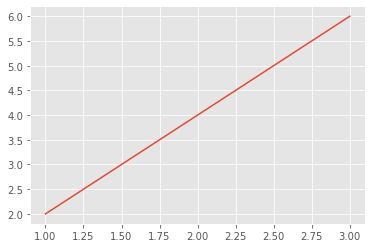

In [2]:
plt.plot([1, 2, 3], [2, 4, 6])

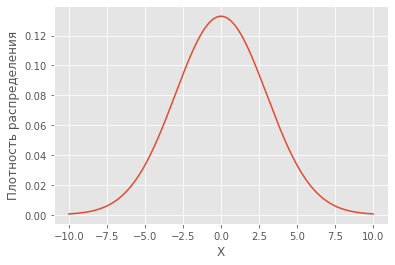

In [12]:
# нарисуем плотность распределения
norm_ = sts.norm(0, 3)

x = np.linspace(-10, 10, 10000)
pdfs = norm_.pdf(x)

plt.plot(x, pdfs)
plt.xlabel('X')
plt.ylabel('Плотность распределения');

### 1.2 Зерна (random_seed / random_state)

Важно, чтобы ваш код был воспроизводимым!

In [23]:
RANDOM_STATE = 43

In [24]:
sts.norm(0, 3).rvs(5, random_state=RANDOM_STATE)

array([ 0.77219978, -2.7254443 , -1.13550932, -1.6047468 ,  2.57422004])

### Задачка 4 (про спам)

In [25]:
poiss_ = sts.poisson(3)

# F(x) = P(X <= x) = 1 - F(x) = P(X > x)
1 - poiss_.cdf(5)

0.08391794203130343

### Задачка 6 (человек и параход)

In [64]:
n = 10**3

sample = np.random.randint(1, 100, size=(n, 10))

X = np.min(sample, axis=1)
Y = np.max(sample, axis=1)

In [72]:
sample.shape

(1000, 10)

In [73]:
np.min(sample)

1

In [77]:
len(np.min(sample, axis=0))

10

In [76]:
len(np.min(sample, axis=1))

1000

In [67]:
usl = Y < X**2

In [70]:
np.mean(Y[usl] > 3*X[usl])

0.9317647058823529

### Логические срезы в numpy

In [33]:
a = np.array([-1, -2, 0, 10, -100])
a

array([  -1,   -2,    0,   10, -100])

In [35]:
# ЗАБИВАЕМ НА ЦИКЛЫ
# s = []
# for x in a:
#     if x >= 0:
#         s.append(x)
        
# s

In [39]:
a >= 0 # булевский массив!

array([False, False,  True,  True, False])

In [40]:
a[0]

-1

In [41]:
a[1:3]

array([-2,  0])

In [42]:
a[a >= 0]

array([ 0, 10])

### Матрицы

In [46]:
a.shape

(5,)

In [47]:
mat = np.array(
    [
        [1, 2],
        [2, 4],
        [3, 8]
    ]
)

In [48]:
mat.shape

(3, 2)

In [49]:
mat[1, 1]

4

In [55]:
mat.reshape(2, 3)

array([[1, 2, 2],
       [4, 3, 8]])

In [56]:
mat.reshape(2, -1) # -1 => сам посчитал что надо

array([[1, 2, 2],
       [4, 3, 8]])

## Решаем задачки на numpy

In [80]:
n = 10**7

a = np.arange(n) # длинный нумпаевский список
b = list(range(n)) # длинный питоновский список

In [81]:
%%timeit
sum(b)

62.9 ms ± 1.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [82]:
%%timeit
np.sum(a)

7.13 ms ± 123 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [84]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [85]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [86]:
np.random.rand(10) # от 0 до 1

array([0.96669456, 0.42550132, 0.44572514, 0.78851058, 0.08673229,
       0.66954417, 0.22709778, 0.87168521, 0.10321846, 0.7951004 ])

### Задачка 2 (нормировка)

In [87]:
X = np.array(
    [
        [24, 180, 100000],
        [19, 170, 60000],
        [53, 176, 20000]
    ]
)

In [90]:
(X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

array([[0.14705882, 1.        , 1.        ],
       [0.        , 0.        , 0.5       ],
       [1.        , 0.6       , 0.        ]])

### Задачка 1 (максимум перед нулем)

In [114]:
def find_max_after_zeros(x):
    shifted_x = np.hstack((1, x))
    bool_mask = (shifted_x == 0)[:-1]
    
    return np.max(x[bool_mask])

In [113]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 0])

find_max_after_zeros(x)

## Задача про нейросетки (с предыдущего семинара)

In [ ]:
# sts.norm(0, 3) # var = 9
# sts.uniform(1, 2) # [1; 3]

In [117]:
n = 10**5

T1 = sts.uniform(1, 2).rvs(n)
T2 = sts.uniform(1, 2).rvs(n)

T = sts.expon(scale=1/0.3).rvs(n)

In [120]:
usl1 = (T1 < T) & (T2 >= T)
usl2 = (T1 >= T) & (T2 < T)

usl = usl1 | usl2 # одна нейросеть обучилась, а вторая нет

In [123]:
np.mean(T[usl] <= 1.5)

0.18961524759529746